In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [17]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# ATLAS Intern Project: Predict the Likelihood of Developing Diabetes Based On Medical Records and Daily Lifestyle

## 1. Dataset Loading

In [18]:
from ucimlrepo import fetch_ucirepo 
  
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 


In [19]:
features_df = pd.DataFrame(X, columns=cdc_diabetes_health_indicators.feature_names)
y = pd.DataFrame(cdc_diabetes_health_indicators['data']['targets'], columns=['Diabetes_binary'])
features_df = pd.concat([features_df, y], axis=1)


## 2. Data Cleaning

In [20]:
features_df.isna().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [21]:
features_df.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

There are no explicit and implicit missing values in the dataframe.

## 3. Exploratory Data Analysis

### 3.1 Multicollinearity 

In [22]:
features_df.corr()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,...,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235,0.263129
HighChol,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,...,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459,0.200276
CholCheck,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,...,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259,0.064761
BMI,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,...,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069,0.216843
Smoker,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,...,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937,0.060789
Stroke,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,...,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599,0.105816
HeartDiseaseorAttack,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,...,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011,0.177282
PhysActivity,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,...,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539,-0.118133
Fruits,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,...,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929,-0.040779
Veggies,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,...,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087,-0.056584


There is no a pair of numerical variables having high correlation

### 3.2 Plots: histogram and heatmap

<Figure size 1400x800 with 0 Axes>

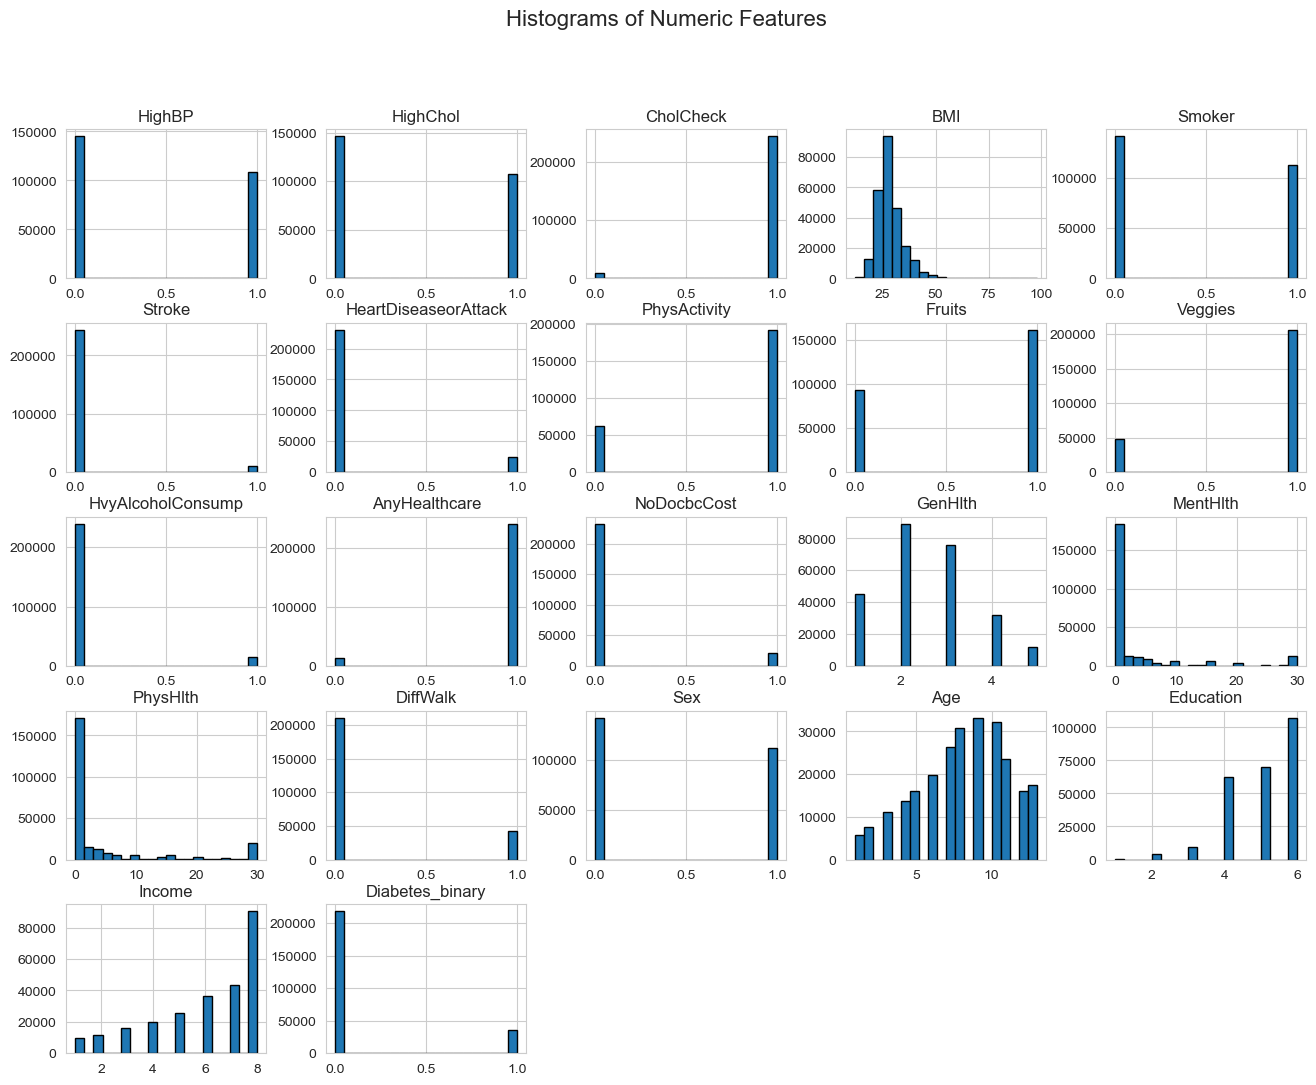

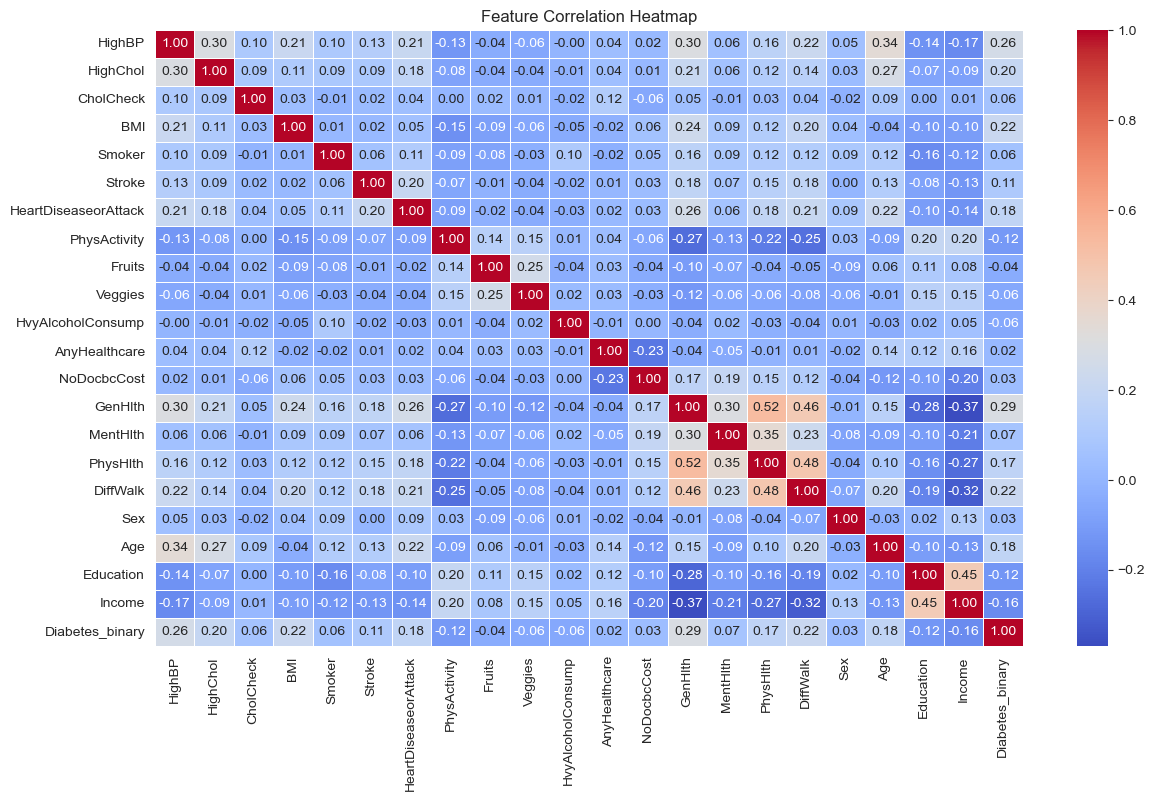

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# 1️. Histogram of Numeric Features
plt.figure(figsize=(14, 8))
features_df.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# 2️ Correlation Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()




From the correlation map, we can see that PhysHlth and GenHlth, DiffWalk and PhysHlth have the highest correlation among all pairs of the explanatory variables. Thus, we may consider drop one of the variable in each of these two paris during model building process.

## 4. Feature Engineering

### 4.1 VIF

In [24]:
!pip install statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = features_df.drop(columns=['Diabetes_binary']) 
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))
high_VIF = features_df[['Education','CholCheck','AnyHealthcare','BMI','Income','GenHlth']]

                 Feature        VIF
19             Education  29.507416
2              CholCheck  23.187436
11         AnyHealthcare  20.839710
3                    BMI  18.149913
20                Income  14.156118
13               GenHlth  10.740162
18                   Age   9.886830
9                Veggies   5.826886
7           PhysActivity   4.645314
8                 Fruits   3.032775
0                 HighBP   2.299761
1               HighChol   2.029660
15              PhysHlth   1.999556
4                 Smoker   1.933042
17                   Sex   1.910708
16              DiffWalk   1.838551
14              MentHlth   1.463103
6   HeartDiseaseorAttack   1.289820
12           NoDocbcCost   1.215834
5                 Stroke   1.126777
10     HvyAlcoholConsump   1.083523


Education (VIF=29.5), CholCheck (VIF=23.2), AnyHealthcare (VIF=20.8), BMI (VIF=18.1), Income (VIF=14.2), and GenHlth (VIF=10.7) are problematic.

These features are likely correlated with others, inflating model variance.

# 5. Model Building

## 5.1 Basic Model Building

### 5.1.1 LogisticRegression

With All Variables:

In [25]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X = features_df.drop(columns=['Diabetes_binary'])  # Features
y = features_df['Diabetes_binary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.86


/Users/caianqiao/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Drop high VIF variables:

In [26]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X = features_df.drop(columns=['Diabetes_binary']) 
X = X.drop(columns=high_VIF, errors='ignore')
y = features_df['Diabetes_binary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.86


### 5.1.2 RandomForest

With all variables:

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = features_df.drop(columns=['Diabetes_binary'])  # Features
y = features_df['Diabetes_binary']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.8607103437401451


Drop high VIF variables:

In [28]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X = features_df.drop(columns=['Diabetes_binary']) 
X = X.drop(columns=high_VIF, errors='ignore')
y = features_df['Diabetes_binary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.86


### 5.1.3 XGBoost

With all predictors

In [29]:

import sys
!{sys.executable} -m pip install xgboost

!pip install xgboost


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:34:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8625236518448439


Drop high VIF values

In [30]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X = features_df.drop(columns=['Diabetes_binary']) 
X = X.drop(columns=high_VIF, errors='ignore')
y = features_df['Diabetes_binary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.86


### 5.1.4 KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)
print("🔍 KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


🔍 KNN Results:
Accuracy: 0.8440555029959004


# 6. Model Improvement

### 6.1 RandomForest feature importance

In [32]:
import numpy as np
import pandas as pd


importances = rf_model.feature_importances_
importances

array([0.04309744, 0.02665964, 0.00362678, 0.18394925, 0.03368011,
       0.01217476, 0.01872699, 0.0256838 , 0.03359684, 0.02637857,
       0.00787256, 0.00862186, 0.01501558, 0.07030184, 0.06379763,
       0.08425815, 0.02384962, 0.02791003, 0.12153669, 0.07050331,
       0.09875853])

In [33]:
import numpy as np
import pandas as pd


importances = rf_model.feature_importances_



X = features_df.drop(columns=['Diabetes_binary']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)




                 Feature  Importance
3                    BMI    0.183949
18                   Age    0.121537
20                Income    0.098759
15              PhysHlth    0.084258
19             Education    0.070503
13               GenHlth    0.070302
14              MentHlth    0.063798
0                 HighBP    0.043097
4                 Smoker    0.033680
8                 Fruits    0.033597
17                   Sex    0.027910
1               HighChol    0.026660
9                Veggies    0.026379
7           PhysActivity    0.025684
16              DiffWalk    0.023850
6   HeartDiseaseorAttack    0.018727
12           NoDocbcCost    0.015016
5                 Stroke    0.012175
11         AnyHealthcare    0.008622
10     HvyAlcoholConsump    0.007873
2              CholCheck    0.003627


In [34]:
print(feature_importance_df.head())


      Feature  Importance
3         BMI    0.183949
18        Age    0.121537
20     Income    0.098759
15   PhysHlth    0.084258
19  Education    0.070503


In [35]:
# Set a threshold (e.g., keep features with importance > 0.02)
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.005]['Feature']

# Select only important features in X
X_selected = X[important_features]



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split data again using only selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a new Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.8603358561967833


The accuracy improves after only keeping variables 
3                   BMI    0.184635

18                  Age    0.122643

20                Income    0.098785

15              PhysHlth    0.084182

13               GenHlth    0.070068

19             Education    0.069318

14              MentHlth

### 6.1 RandomForest Lasso

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# Extract features and target variable
X = features_df.drop(columns=['Diabetes_binary'])  # Features
y = features_df['Diabetes_binary']  # Target

# Standardize the features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso with cross-validation
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Get nonzero coefficients (selected features)
selected_features = np.array(X.columns)[lasso.coef_ != 0]

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Step 1: Get the list of selected feature names from Lasso
selected_features = feature_importance_df[feature_importance_df['Coefficient'] != 0]['Feature'].tolist()

# Step 2: Use these to filter your original features_df
X_selected = features_df[selected_features]

# Step 3: Split using the filtered features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



# Train a new Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.8580889309366131


After performing lasso, the accuracy decrease. Thus, we keep the result of doing feature importance.

### 6.2 XGBoost

Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='accuracy')


print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))


/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:35:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:35:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:35:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:35:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

Cross-validation accuracy scores: [0.86676127 0.8656181  0.86636708 0.86076947 0.8652239  0.86443551
 0.86684011 0.86475087 0.86534216 0.86479029]
Mean CV accuracy: 0.865089877010407
Standard deviation of CV accuracy: 0.0016476508824912375


Hyperparameter Tuning -> GridSearch

In [40]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)


grid_search.fit(X, y)


print("Best parameters:", grid_search.best_params_)
print("Best HYPER:", grid_search.best_score_)



Fitting 5 folds for each of 72 candidates, totalling 360 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/caianqiao/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/Users/caianqiao/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/caianqiao/miniconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best HYPER: 0.8669899085462


Cross Validation

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')
print("Stratified CV accuracy:", cv_scores)


/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

Stratified CV accuracy: [0.86449464 0.86469174 0.86603201 0.86579549 0.86548013]


After doing cross validation and grid_seearch, the accuracy almost stays the same.

### Feature Importance

/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


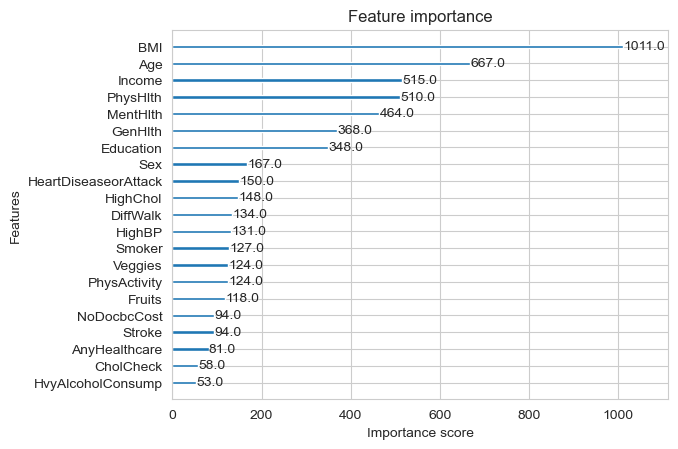

In [42]:
import matplotlib.pyplot as plt

xgb_model.fit(X, y)
xgb.plot_importance(xgb_model)
plt.show()


/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

    NumFeatures  Accuracy
0             1  0.862090
1             2  0.862090
2             3  0.862248
3             4  0.862583
4             5  0.862780
5             6  0.862938
6             7  0.866840
7             8  0.867668
8             9  0.866880
9            10  0.867826
10           11  0.867569
11           12  0.867175
12           13  0.866781
13           14  0.867944
14           15  0.867668
15           16  0.866880
16           17  0.867215
17           18  0.867175
18           19  0.866052
19           20  0.867313
20           21  0.867096

 Best number of features: 14.0, Accuracy: 0.8679


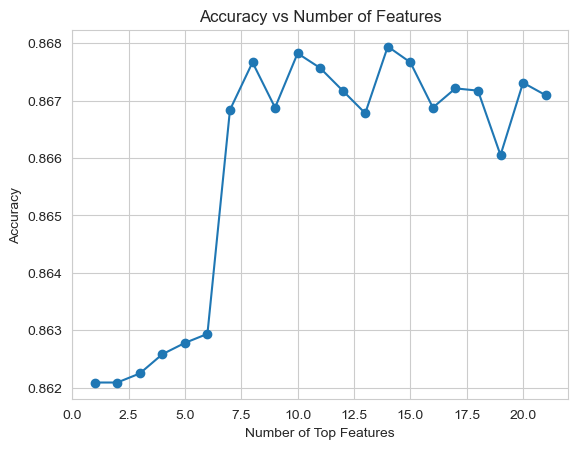

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X, y)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


results = []

for k in range(1, len(X.columns) + 1):
    top_k_features = feature_importance['Feature'].iloc[:k].tolist()
    
    X_selected = X[top_k_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))


results_df = pd.DataFrame(results, columns=['NumFeatures', 'Accuracy'])
print(results_df)


best = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n Best number of features: {best['NumFeatures']}, Accuracy: {best['Accuracy']:.4f}")


plt.plot(results_df['NumFeatures'], results_df['Accuracy'], marker='o')
plt.xlabel("Number of Top Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features")
plt.grid(True)
plt.show()


In [44]:
top_14_features = feature_importance['Feature'].iloc[:14].tolist()
print(top_14_features)


['HighBP', 'GenHlth', 'HighChol', 'HvyAlcoholConsump', 'CholCheck', 'Age', 'BMI', 'HeartDiseaseorAttack', 'DiffWalk', 'Sex', 'Income', 'Stroke', 'Veggies', 'NoDocbcCost']


The accuracy improves a bit with 14 features (drop 6 features)

### Hyperparameter + Cross Validation Agian

In [45]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid, 
    n_iter=10,                      
    scoring='accuracy',
    cv=3,                             
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',       # REQUIRED for early stopping_
)





Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

In [46]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/caianqiao/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:38:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [47]:
from sklearn.metrics import accuracy_score

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on test set
y_pred = best_model.predict(X_test)

# Calculate test accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.8677


# 7. Final Model

The final model is the one with highest accuracy. It is a XGBoost model. It has 14 features (original 20 features)

['HighBP', 'GenHlth', 'HighChol', 'HvyAlcoholConsump', 'CholCheck', 'Age', 'BMI', 'HeartDiseaseorAttack', 'DiffWalk', 'Sex', 'Income', 'Stroke', 'Veggies', 'NoDocbcCost']